In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

data = diabetes_dataset['data']
targets = diabetes_dataset['target']

In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets-targets.mean(axis=0))/targets.std()

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)

(397, 10)
(45, 10)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model


model = get_model()

In [7]:
# Print the model summary

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9406 - mae: 0.8281 - val_loss: 1.1070 - val_mae: 0.8816
Epoch 2/100
337/337 - 0s - loss: 0.8576 - mae: 0.7941 - val_loss: 0.8621 - val_mae: 0.7791
Epoch 3/100
337/337 - 0s - loss: 0.6826 - mae: 0.7195 - val_loss: 0.6299 - val_mae: 0.6767
Epoch 4/100
337/337 - 0s - loss: 0.5299 - mae: 0.6059 - val_loss: 0.4994 - val_mae: 0.5609
Epoch 5/100
337/337 - 0s - loss: 0.4917 - mae: 0.5717 - val_loss: 0.6257 - val_mae: 0.6320
Epoch 6/100
337/337 - 0s - loss: 0.4972 - mae: 0.5598 - val_loss: 0.5564 - val_mae: 0.6033
Epoch 7/100
337/337 - 0s - loss: 0.4649 - mae: 0.5738 - val_loss: 0.6701 - val_mae: 0.6504
Epoch 8/100
337/337 - 0s - loss: 0.4745 - mae: 0.5477 - val_loss: 0.5079 - val_mae: 0.5667
Epoch 9/100
337/337 - 0s - loss: 0.4456 - mae: 0.5535 - val_loss: 0.5778 - val_mae: 0.6164
Epoch 10/100
337/337 - 0s - loss: 0.4656 - mae: 0.5470 - val_loss: 0.5053 - val_mae: 0.5743
Epoch 11/100
337/337 - 0s - loss: 0.4604 - m

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6049 - mae: 0.6895


[0.8439923988448249, 0.6895481]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

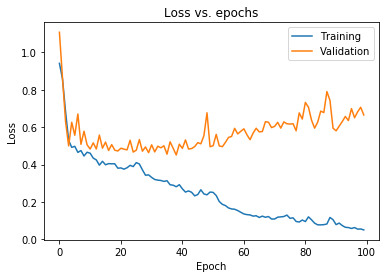

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(0.00001, 0.3)


In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 0.9545 - mae: 0.8315 - val_loss: 1.1756 - val_mae: 0.9035
Epoch 2/100
337/337 - 0s - loss: 0.9374 - mae: 0.8218 - val_loss: 1.1260 - val_mae: 0.8838
Epoch 3/100
337/337 - 0s - loss: 0.8824 - mae: 0.7967 - val_loss: 0.9403 - val_mae: 0.8089
Epoch 4/100
337/337 - 0s - loss: 0.7314 - mae: 0.7235 - val_loss: 0.6380 - val_mae: 0.6657
Epoch 5/100
337/337 - 0s - loss: 0.6264 - mae: 0.6452 - val_loss: 0.5329 - val_mae: 0.5837
Epoch 6/100
337/337 - 0s - loss: 0.5971 - mae: 0.6153 - val_loss: 0.5450 - val_mae: 0.5965
Epoch 7/100
337/337 - 0s - loss: 0.5579 - mae: 0.6053 - val_loss: 0.5677 - val_mae: 0.6229
Epoch 8/100
337/337 - 0s - loss: 0.5378 - mae: 0.6141 - val_loss: 0.5617 - val_mae: 0.6206
Epoch 9/100
337/337 - 0s - loss: 0.5091 - mae: 0.5772 - val_loss: 0.5444 - val_mae: 0.5970
Epoch 10/100
337/337 - 0s - loss: 0.5413 - mae: 0.5912 - val_loss: 0.5740 - val_mae: 0.5934
Epoch 11/100
337/337 - 0s - loss: 0.4978 - m

In [18]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6578 - mae: 0.6822


[0.8520020703474681, 0.6821796]

#### Plot the learning curves

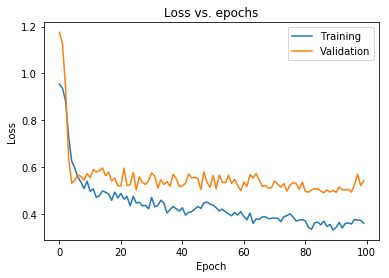

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [21]:
# Write a custom callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs=None):
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
    
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_train_end(self, logs=None):
        print("Finished training!")
        
        

In [27]:

from tensorflow.keras.callbacks import Callback

class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print("Starting testing...")
    
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")

In [29]:
from tensorflow.keras.callbacks import Callback

class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print("Starting testing...")
    
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished prediction!")

In [30]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [31]:
# Compile the model

model.compile(optimizer='adam', loss='mse')

#### Train the model with the callback

In [32]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks = [TrainingCallback()])

Starting training...
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished training!


In [33]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])


Starting testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished testing!


1.08628984424803

In [34]:
# Make predictions with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])


Starting testing...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished prediction!


array([[ 0.01835411],
       [-0.04161798],
       [-0.15961948],
       [-0.15675357],
       [-0.02132522],
       [-0.19752297],
       [-0.12949365],
       [ 0.0110468 ],
       [ 0.04714628],
       [-0.07718766],
       [-0.1516792 ],
       [-0.16425894],
       [-0.12873618],
       [-0.08403505],
       [ 0.02938743],
       [-0.12746237],
       [ 0.00179012],
       [-0.14668751],
       [-0.16028059],
       [-0.03539544],
       [-0.11677319],
       [ 0.01932137],
       [-0.1344163 ],
       [-0.12878034],
       [-0.08646328],
       [-0.06745189],
       [-0.0896318 ],
       [-0.15902291],
       [ 0.01717676],
       [-0.15149769],
       [-0.09273172],
       [ 0.03780481],
       [-0.19379282],
       [ 0.00071426],
       [-0.04504307],
       [ 0.00590223],
       [-0.13547981],
       [ 0.03712722],
       [-0.09023941],
       [ 0.05327142],
       [-0.14132144],
       [-0.06365077],
       [-0.08629734],
       [-0.11085609],
       [-0.1411412 ]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [49]:
# Re-train the unregularised model
unregularized_model = get_model()

unregularized_model.compile(optimizer='adam', loss='mse')

unreg_history = unregularized_model.fit(train_data, train_targets, epochs=100, 
                                        validation_split=0.15, batch_size=64, verbose=False,
                                       callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)])

In [50]:
# Evaluate the model on the test set
unregularized_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.4622


0.6809043364392386

In [51]:
# Re-train the regularised model

regularized_model = get_regularised_model(1e-5, 0.2)
regularized_model.compile(optimizer='adam', loss='mse')
reg_history = regularized_model.fit(train_data, train_targets, epochs=100, 
                                        validation_split=0.15, batch_size=64, verbose=False,
                                       callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)])

In [52]:
# Evaluate the model on the test set
regularized_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.5009


0.705164948436949

#### Plot the learning curves

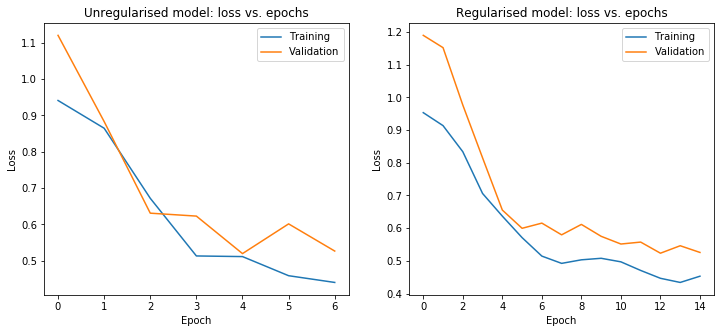

In [53]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()